In [1]:
file=open("bacteriorhodopsin.txt") #opens the text file

In [2]:
AA= file.read() #reads the opened file

In [3]:
#creates dictionary of amino acids with hydrophobicity values
AADict = {"A":1.8, "C":2.5,"D":-3.5,"E":-3.5 ,"F":2.8,"G":-0.4 ,"H":-3.20, "I":4.50,"K":-3.90,"L":3.80, "M":1.90, 
          "N":-3.50,"P":-1.60, "Q": -3.50, "R":-4.50, "S":-0.80, "T":-0.70,"V":4.20,"W": -0.9,"Y":-1.30} 

In [9]:
#creating a list of hydrophobicity values for the protein
AAH=[] #creates an empty list to hold hydrophobicity values of amino acids in rhodopsin
AA1= AA.strip('\n') #removes empty spaces from string
for item in AA1: #creates a for loop to add values to empty list
    AAH.append(AADict[item]) #adds values to empty list

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
#creating a list of weights to multiply hydrophobicity values by for weighted avg
weights= []
#appending numbers 1-11
for i in range(1,12): 
    weights.append(i)

#appending numbers 10-1
c = 11
for i in range(1,11):
    c = c - 1 
    weights.append(c)
#print(weights)

#turning weights list into an array; using arrays bc we can't multiply lists/strings together, but we can multiply arrays
weightsarray = np.array([weights]) 
#print(weightsarray)

#weighted avg
AAavgs = []  #empty list 
for  i in range(10, 230):  #for item position in AAH excluding the first and last 10 items(starting with 10 because its in the middle of 21(20 for positions))
    AAHarray = np.array(AAH[(i-10): (i+11)])
    AAHmean= np.sum(AAHarray*weightsarray)/np.sum(weightsarray)  #taking the average of values 10 before i, i, and 10 after i
    AAavgs.append(AAHmean)   # adding them to our empty list AAavgs
    
#unweighted avg
AAavgs2 = []
for  i in range(10, 230): 
    AAHmean = (sum(AAH[(i-10):(i+11)]))/21
    AAavgs2.append(AAHmean)

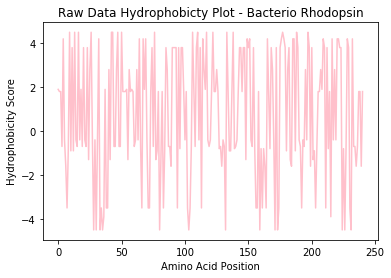

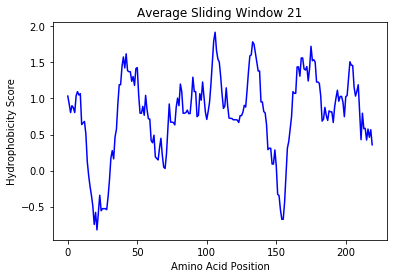

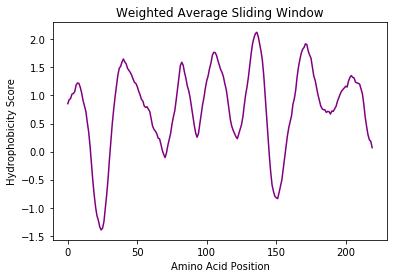

In [8]:

#noisy plot
xvalues = range(len(AA1)) #creates list of integers from 0 up to the length of AA sequence
plt.plot(xvalues, AAH, color = 'pink') #plots hydrophicity values on a line graph
#plt.axhline(y=0, color = 'red') #creates horizontal line at y=0
plt.xlabel("Amino Acid Position") #labels x axis
plt.ylabel("Hydrophobicity Score") #labels y axis
plt.title ("Raw Data Hydrophobicty Plot - Bacterio Rhodopsin")
plt.show()

#kinda smooth plot
xvalues = range(len(AAavgs2)) #creates list of integers from 0 up to the length of AA sequence
plt.plot(xvalues, AAavgs2, color = 'blue') #plots hydrophicity values on a line graph
#plt.axhline(y=1.6, color = 'red') #creates horizontal line at y=0
plt.xlabel("Amino Acid Position") #labels x axis
plt.ylabel("Hydrophobicity Score") #labels y axis
plt.title ("Average Sliding Window 21")
plt.show()

#smooth plot :)
xvalues = range(len(AAavgs)) #creates list of integers from 0 up to the length of AA sequence
plt.plot(xvalues, AAavgs, color = 'purple') #plots hydrophicity values on a line graph
#plt.axhline(y=1.6, color = 'red') #creates horizontal line at y=0
plt.xlabel("Amino Acid Position") #labels x axis
plt.ylabel("Hydrophobicity Score") #labels y axis
plt.title ("Weighted Average Sliding Window")
plt.show() #shows plot

